### Regresión lineal simple con solución cerrada (Ecuaciones normales)

$$ w = \frac{\sum_{i=1}^n x_i y_i - \frac{1}{n}\left(\sum_{i=1}^n x_i\right)\left(\sum_{i=1}^n y_i\right)}{\sum_{i=1}^n x_i^2 - \frac{1}{n}\left(\sum_{i=1}^n x_i\right)^2} $$

$$ b = \frac{1}{n}\sum_{i=1}^n y_i - \frac{w}{n}\sum_{i=1}^n x_i $$


Modelo: y = 5.222151077447229 + 1.9936935021402038 * x


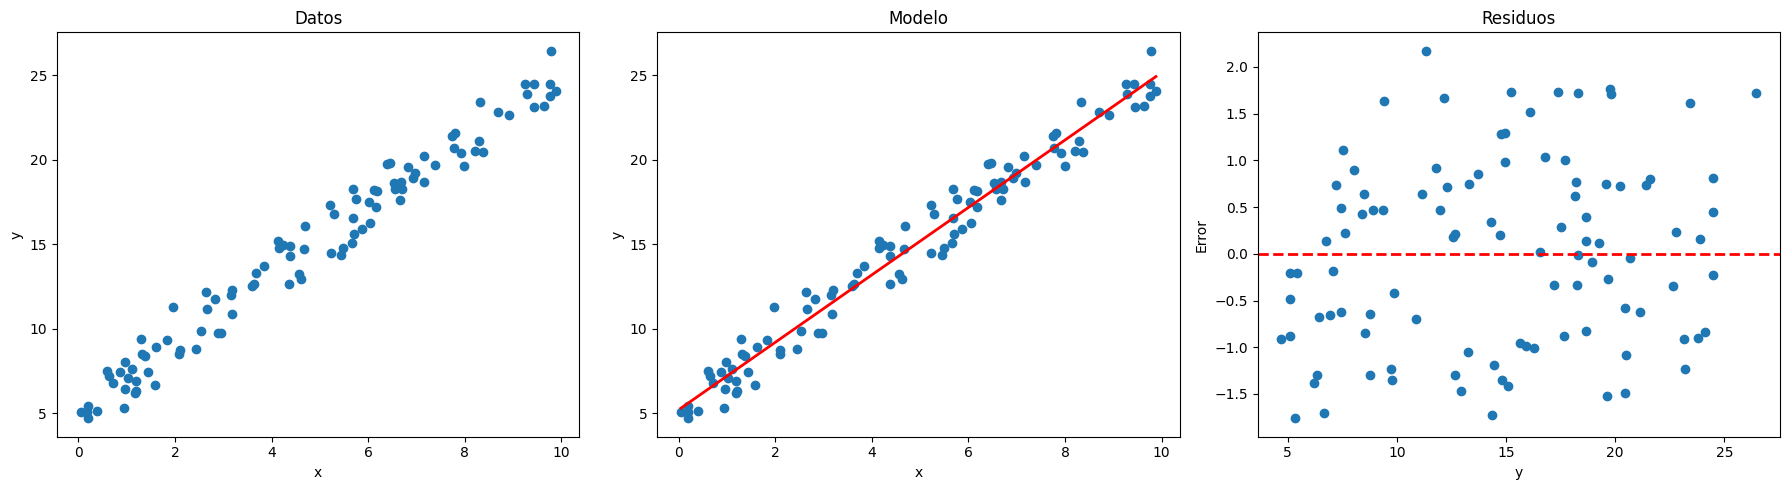

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Generar datos
x = np.random.uniform(0, 10, 100)
y = 5 + 2*x + np.random.normal(0, 1, 100)

# Calcular coeficientes del modelo (closed-form)
n = len(x)
w = ((x*y).sum() - (1./n)*x.sum()*y.sum()) / ((x*x).sum() - (1./n)*(x.sum()**2))
b = (1./n)*y.sum() - (w/n)*x.sum()
print("Modelo: y =", b, "+", w, "* x")

# Predicciones y residuos
y_pred = w*x + b
r = y - y_pred

# ---- Tres subplots ----
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Datos originales
axes[0].scatter(x, y)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Datos')

# línea de regression
idx = np.argsort(x)
axes[1].scatter(x, y)
axes[1].plot(x[idx], y_pred[idx], color='red', linewidth=2)
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('Modelo')

# Residuos
axes[2].scatter(y, r)
axes[2].axhline(0, color='red', linestyle='--', linewidth=2)
axes[2].set_xlabel('y')
axes[2].set_ylabel('Error')
axes[2].set_title('Residuos')

plt.tight_layout()
plt.show()


# Dataset diabetes

Diabetes dataset
442 muestras (filas), 10 caracteristicas (columnas)

Características:
- age – Edad del paciente.
- sex – Sexo del paciente.
- bmi – Índice de masa corporal (body mass index).
- bp – Presión arterial promedio.
- s1 – Medida de colesterol sérico.
- s2 – LDL (lipoproteínas de baja densidad).
- s3 – HDL (lipoproteínas de alta densidad).
- s4 – Relación de colesterol total con HDL.
- s5 – Nivel de triglicéridos en sangre.
- s6 – Nivel de glucosa en sangre.

Variable objetivo:

Una medida cuantitativa de la progresión de la diabetes un año después de la primera observación.


### Caso 1. Entrenamiento y validación con el mismo conjunto de datos (No recomendado, sobreestima el desempeño)

La siguiente celda entrena y valida un modelo de regresion lineal utilizando el mismo conjunto de datos. Esto no es recomendado, ya que la estimación del desempeño es optimista.

In [2]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


diabetes = datasets.load_diabetes()
x = diabetes.data
y = diabetes.target
features = diabetes.feature_names
n_features = len(features)

print(f"# features: {n_features}")

regr = LinearRegression()
regr.fit(x, y)

print("Coeficientes del modelo: \n", regr.coef_)

y_pred = regr.predict(x)
print('MSE: \n', mean_squared_error(y, y_pred))
print('MAE: \n', mean_absolute_error(y, y_pred))
print("R^2: \n", r2_score(y, y_pred))


# features: 10
Coeficientes del modelo: 
 [ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]
MSE: 
 2859.69634758675
MAE: 
 43.27745202531506
R^2: 
 0.5177484222203499


### Caso 2. Entrena y evalúa en conjuntos separados (train, test)

In [3]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 1. Load dataset
diabetes = load_diabetes()
x = diabetes.data
y = diabetes.target
features = diabetes.feature_names
n_features = len(features)
print(f"# features: {n_features}")

# 2. Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0
)

# 4. Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Predicciones y evaluación
y_pred = model.predict(X_test)
print("Intercepto:", model.intercept_)
for name, coef in zip(features, model.coef_):
    print(f"{name}: {coef:.4f}")
print('-'*10)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# features: 10
Intercepto: 152.5380470138517
age: -35.5503
sex: -243.1651
bmi: 562.7623
bp: 305.4635
s1: -662.7029
s2: 324.2074
s3: 24.7488
s4: 170.3250
s5: 731.6374
s6: 43.0309
----------
MSE: 3424.259334298692
MAE: 46.17358500370479
R²: 0.3322332173106184


### Caso 3. Utiliza K-Fold validación cruzada en un bucle manual

In [4]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 1. Load dataset
diabetes = load_diabetes()
x = diabetes.data
y = diabetes.target
features = diabetes.feature_names
n_features = len(features)
print(f"# features: {n_features}")

n_folds = 5
kf = KFold(n_splits=n_folds, shuffle = True, random_state=0)

mse = 0
mae = 0
r2 = 0
for k, (train_index, test_index) in enumerate(kf.split(x)):
    print(f'Iteración de k-fold: {k+1}')
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    regr_cv = LinearRegression()
    regr_cv.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]

    y_pred = regr_cv.predict(x_test)

    # Calculate MSE and R^2
    mse_i = mean_squared_error(y_test, y_pred)
    print('\t mse = ', mse_i)

    mae_i = mean_absolute_error(y_test, y_pred)
    print('\t mae = ', mae_i)

    r2_i = r2_score(y_test, y_pred)
    print('\t r^2= ', r2_i)

    mse += mse_i
    mae += mae_i
    r2 += r2_i


print("\nMetricas promedio: \n")

mse = mse/n_folds
print('MSE = ', mse)

mae = mae/n_folds
print('MAE = ', mae)

r2 = r2/n_folds
print('R^2 = ', r2)



# features: 10
Iteración de k-fold: 1
	 mse =  3424.259334298693
	 mae =  46.1735850037048
	 r^2=  0.33223321731061806
Iteración de k-fold: 2
	 mse =  2890.8945076703667
	 mae =  43.58195742468968
	 r^2=  0.45970425424589056
Iteración de k-fold: 3
	 mse =  2964.580485709375
	 mae =  45.72638470098916
	 r^2=  0.5370636865383392
Iteración de k-fold: 4
	 mse =  2854.937426125663
	 mae =  42.35028879490521
	 r^2=  0.521653908550179
Iteración de k-fold: 5
	 mse =  2753.3208215123823
	 mae =  43.62921474523517
	 r^2=  0.5951198005819458

Metricas promedio: 

MSE =  2977.598515063296
MAE =  44.2922861339048
R^2 =  0.4891549734453945


### Caso 4. Utiliza K-Fold validación cruzada y la funcion cross validate

1. Investiga la función cross_validate de sklearn
2. Utilizala para evaluar el modelo

In [12]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 1. Load dataset
diabetes = load_diabetes()
x = diabetes.data
y = diabetes.target
features = diabetes.feature_names
n_features = len(features)
print(f"# features: {n_features}")

# 2. Definir el modelo
regr = LinearRegression()

# 3. Realizar validación cruzada
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']
cv_results = cross_validate(regr, x, y, cv=5, scoring=scoring)

# 4. Mostrar resultados
print("Resultados de cross_validate:")
for metric in scoring:
    # cross_validate returns negative MSE and MAE, so we take the absolute value
    if 'neg_' in metric:
        print(f"{metric[4:].upper()}: {-cv_results[f'test_{metric}'].mean():.4f}")
    else:
        print(f"{metric.upper()}: {cv_results[f'test_{metric}'].mean():.4f}")

# features: 10
Resultados de cross_validate:
MEAN_SQUARED_ERROR: 2993.0813
MEAN_ABSOLUTE_ERROR: 44.2765
R2: 0.4823


### Caso 5. Utiliza cross_val_predict function

In [5]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

diabetes = load_diabetes()
x = diabetes.data
y = diabetes.target
features = diabetes.feature_names
n_features = len(features)
print(f"# features: {n_features}")

regr = LinearRegression()
y_pred = cross_val_predict(regr, x, y, cv = 5)

print("y_pred shape: ", y_pred.shape)

print('mse = ', mean_squared_error(y, y_pred))
print('mae = ', mean_absolute_error(y, y_pred))
print('r^2= ', r2_score(y, y_pred))


# features: 10
y_pred shape:  (442,)
mse =  2992.6799465939957
mae =  44.27485590220917
r^2=  0.4953224221682184


# Selección de características utilizando métodos tipo wrapper

### Regresion lineal con selección de características sequencial

La siguiente celda:

1. Selecciona la mitad de las características usando una busqueda sequencial de tipo codiciosa.
    - a) Selecciona la mitad de las caracteristicas con SequentialFeatureSelector
    - b) Evalúa usando los datos de entrenamiento (no recomendado)
    - c) Evalúa utilizando validación cruzada (recomendado).

2. Utiliza la selección de características sequencial para decidir el número óptimo de características.



#### Reduce el número de características a la mitad (Modo incorrecto)

El problema es que hay data leakage, porque la selección de variables usa todo el dataset antes de evaluar, dando métricas demasiado optimistas.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

diabetes = datasets.load_diabetes()
x = diabetes.data
y = diabetes.target
features = diabetes.feature_names
n_features = len(features)

print("\n ----- Feature selection using 50% of predictors -----")

regr = linear_model.LinearRegression()
fselection = SequentialFeatureSelector(regr, n_features_to_select = 0.5)
fselection.fit(x, y)
print("Selected features: ", fselection.get_feature_names_out())

# Fit model using the new dataset and evaluate MSE, MAE and R^2
x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)
print("Model coefficients: ", regr.coef_)
print("Model intercept: ", regr.intercept_)

y_pred = regr.predict(x_transformed)
print("Evaluation using training data (not recommended): ")
print('MSE: ', mean_squared_error(y, y_pred))
print("MAE: ", mean_absolute_error(y, y_pred))
print("R^2: ", r2_score(y, y_pred))



 ----- Feature selection using 50% of predictors -----
Selected features:  ['x1' 'x2' 'x3' 'x6' 'x8']
Model coefficients:  [-235.77241318  523.56778633  326.23106396 -289.11483015  474.29023146]
Model intercept:  152.13348416289602
Evaluation using training data (not recommended): 
MSE:  2913.758270125213
MAE:  43.76138263316659
R^2:  0.5086315635496814


#### Reduce el número de características a la mitad usando validación cruzada (Modo correcto)

Este es el modo correcto para evitar fuga de datos. Ya que la selección de características se hace solamente con los datos de entrenamiento. La evaluación se realiza en un conjunto de prueba separado.

In [7]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

diabetes = datasets.load_diabetes()
x = diabetes.data
y = diabetes.target
features = diabetes.feature_names
n_features = len(features)

mse_cv = []
mae_cv = []
r2_cv = []

kf = KFold(n_splits=5, shuffle = True)

for train_index, test_index in kf.split(x):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    regr_cv = linear_model.LinearRegression()

    fselection_cv = SequentialFeatureSelector(regr_cv, n_features_to_select=0.5)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)

    regr_cv.fit(x_train, y_train)

    # Test phase
    x_test = fselection_cv.transform(x[test_index, :])
    y_test = y[test_index]
    y_pred = regr_cv.predict(x_test)

    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)

    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)

    r2_i = r2_score(y_test, y_pred)
    r2_cv.append(r2_i)

print("Evaluation using cross-validation (recommended): ")
print('MSE:', np.average(mse_cv), '  MAE:', np.average(mae_cv),'  R^2:', np.average(r2_cv))

Evaluation using cross-validation (recommended): 
MSE: 3041.7585315318975   MAE: 44.78537176470677   R^2: 0.4849275841241947


#### Encuentra el número óptimo de features

---- n features = 1
MSE: 4093.236824731904   MAE: 52.73641671218636   R^2: 0.30350685945740385
---- n features = 2
MSE: 3245.4392006491516   MAE: 47.123155295226134   R^2: 0.4456307876417333
---- n features = 3
MSE: 3147.240483208059   MAE: 46.341964621977894   R^2: 0.45262938892643323
---- n features = 4
MSE: 3219.7087249490296   MAE: 46.4709398065639   R^2: 0.4516037472067043
---- n features = 5
MSE: 3059.371907912727   MAE: 44.87826465237951   R^2: 0.4770995251388614
---- n features = 6
MSE: 3034.303968358903   MAE: 44.640879422605735   R^2: 0.4878635134645629
---- n features = 7
MSE: 3004.8120143525534   MAE: 44.247916482186184   R^2: 0.48911421067667804
---- n features = 8
MSE: 3097.8574643646557   MAE: 45.298754889720456   R^2: 0.45315767713815147
---- n features = 9
MSE: 3026.267921057003   MAE: 44.39910748739436   R^2: 0.4789267551623556
Optimal number of features:  7


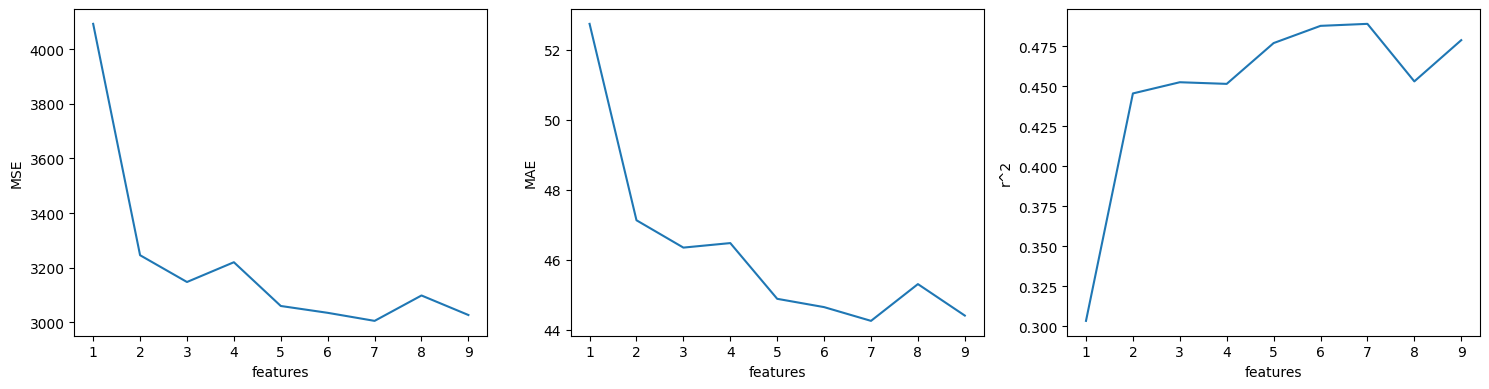

Selected features:  ['x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x8']
Model coefficients:  [-229.39094705  529.13049183  328.2863938  -627.3116484   427.91955305
  -58.33938198  749.17477877]
Model intercept:  152.13348416289597


In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

diabetes = datasets.load_diabetes()
x = diabetes.data
y = diabetes.target
features = diabetes.feature_names
n_features = len(features)

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        regr_cv = linear_model.LinearRegression()

        fselection_cv = SequentialFeatureSelector(regr_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)


    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

fig, axs = plt.subplots(1, 3, figsize=(15, 4), tight_layout=True)

axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

# Fit model with optimal number of features
regr = linear_model.LinearRegression()
fselection = SequentialFeatureSelector(regr, n_features_to_select = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)
print("Model coefficients: ", regr.coef_)
print("Model intercept: ", regr.intercept_)


### Regresion lineal con selección de características regresiva

1. Empieza con todas las características.
2. Entrena un modelo (por ejemplo, LinearRegression, RandomForest, SVC, etc.).
3. Calcula la importancia de cada característica (según los coeficientes o atributos del modelo).
4. Elimina la(s) característica(s) menos importante(s).
5. Repite el proceso recursivamente hasta que queden solo las características deseadas (n_features_to_select).



In [9]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE

# Import Diabetes dataset
diabetes = datasets.load_diabetes()
x = diabetes.data
y = diabetes.target
features = diabetes.feature_names
n_features = len(features)

# Evaluate model using cross validation
mse_cv = []
mae_cv = []
r2_cv = []

kf = KFold(n_splits=5, shuffle = True)

for train_index, test_index in kf.split(x):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    regr_cv = linear_model.LinearRegression()

    fselection_cv = RFE(regr_cv, n_features_to_select=0.5)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)

    regr_cv.fit(x_train, y_train)

    # Test phase
    x_test = fselection_cv.transform(x[test_index, :])
    y_test = y[test_index]
    y_pred = regr_cv.predict(x_test)

    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)

    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)

    r2_i = r2_score(y_test, y_pred)
    r2_cv.append(r2_i)

print('MSE:', np.average(mse_cv), '  MAE:', np.average(mae_cv),'  R^2:', np.average(r2_cv))

MSE: 3067.698676923422   MAE: 45.15657870539559   R^2: 0.47770876426178177


Encontrar el número óptimo de features usando método recursivo

---- n features = 1
MSE: 4061.9578244182458   MAE: 52.93596499441675   R^2: 0.30424904246404166
---- n features = 2
MSE: 3219.8123816530374   MAE: 46.92525085071229   R^2: 0.4552479199053326
---- n features = 3
MSE: 3164.328513956664   MAE: 46.18520378972108   R^2: 0.46052739004055976
---- n features = 4
MSE: 3139.929929676214   MAE: 45.83778416505359   R^2: 0.45462173383706894
---- n features = 5
MSE: 3046.0229286649387   MAE: 45.11229146893219   R^2: 0.4829026246610065
---- n features = 6
MSE: 3007.243672487647   MAE: 44.71214549016151   R^2: 0.4770016201306747
---- n features = 7
MSE: 3020.586071158884   MAE: 44.550516930453156   R^2: 0.47843507900132753
---- n features = 8
MSE: 2975.045099510843   MAE: 44.40433388049123   R^2: 0.4972089228911205
---- n features = 9
MSE: 3028.265207740211   MAE: 44.56924862216105   R^2: 0.48471198962817486
Optimal number of features:  8


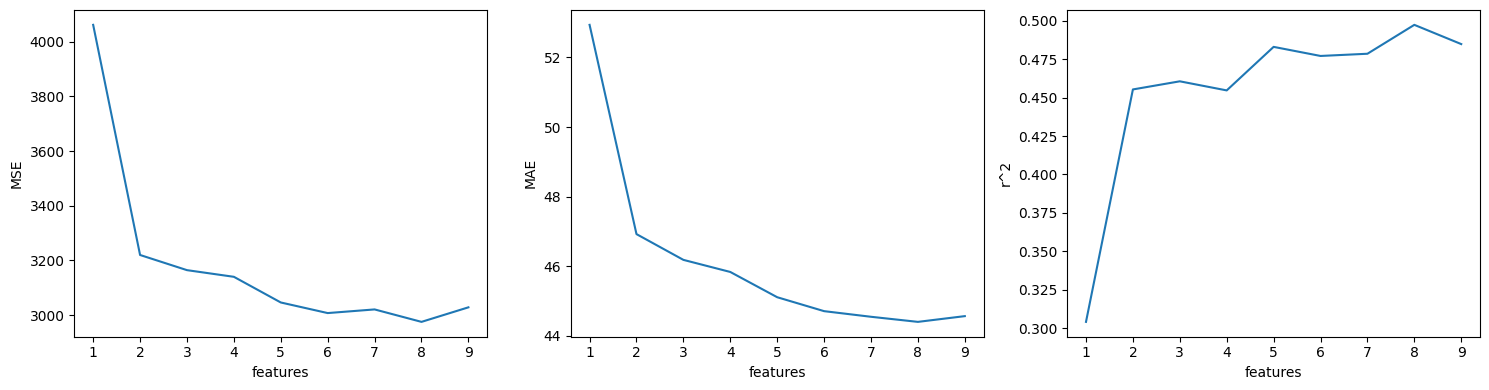

Selected features:  ['x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8']
Model coefficients:  [-235.4943705   530.09715636  334.49185311 -797.00623113  481.80920972
  106.51394406  188.80713993  766.58930094]
Model intercept:  152.13348416289597


In [10]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE

# Import Diabetes dataset
diabetes = datasets.load_diabetes()
x = diabetes.data
y = diabetes.target
features = diabetes.feature_names
n_features = len(features)

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        regr_cv = linear_model.LinearRegression()

        fselection_cv = RFE(regr_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)


    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

fig, axs = plt.subplots(1, 3, figsize=(15, 4), tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

regr = linear_model.LinearRegression()
fselection = RFE(regr, n_features_to_select = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)
print("Model coefficients: ", regr.coef_)
print("Model intercept: ", regr.intercept_)


### Regresión lineal con selección de características tipo filter

1. Uso de un método filter que utiliza la correlación de pearson para calcular las 5 mejores caracteristicas bajo este criterio.
2. Encontrar el número óptimo de características utilizando el método filter.


---- n features = 1
MSE: 3908.588228095934   MAE: 51.90949086392874   R^2: 0.3363584886022327
---- n features = 2
MSE: 3229.7854582604014   MAE: 46.90912358288871   R^2: 0.45496645514933276
---- n features = 3
MSE: 3213.959569092277   MAE: 46.91778590809841   R^2: 0.4501152275859631
---- n features = 4
MSE: 3153.16111306544   MAE: 46.41693297184001   R^2: 0.4575486323083463
---- n features = 5
MSE: 3143.351628678521   MAE: 46.19275078648642   R^2: 0.45980018174888987
---- n features = 6
MSE: 3059.2613328892835   MAE: 45.251612874714716   R^2: 0.47818266601203935
---- n features = 7
MSE: 3118.3081331829594   MAE: 45.685825113949825   R^2: 0.46900015641141996
---- n features = 8
MSE: 3103.292771243931   MAE: 45.49503355837732   R^2: 0.47039765622428653
---- n features = 9
MSE: 3016.00645160462   MAE: 44.55803184868449   R^2: 0.48045092115440236
Optimal number of features:  9


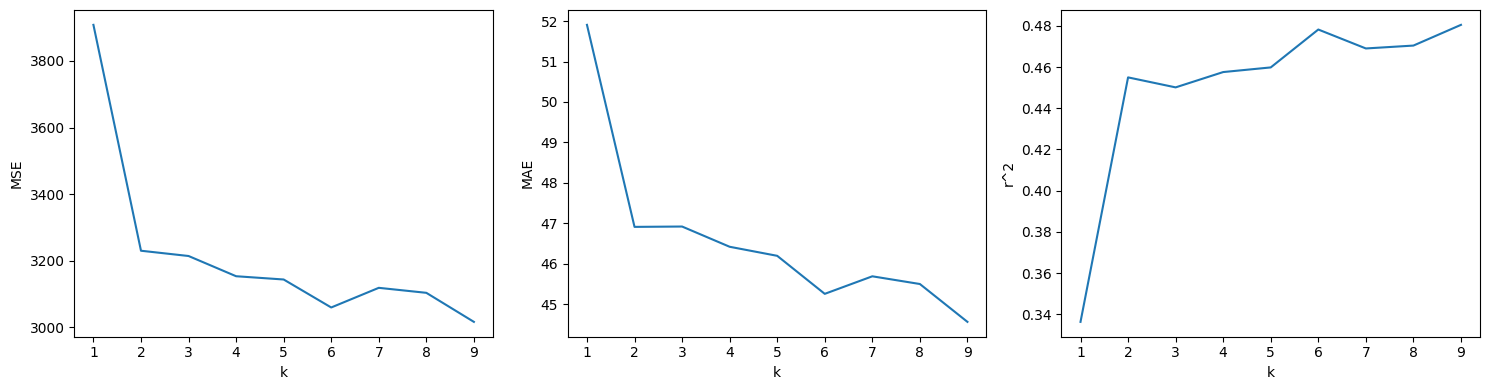


 ----- Final model with optimal selection of number of features -----
Selected features:  ['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x7' 'x8' 'x9']
Model coefficients:  [  -8.95151061 -241.16056721  518.71569725  323.35644231 -619.77326006
  354.63165339  126.2650948   692.82455653   68.45594372]
Model intercept:  152.133484162896


In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, r_regression

# Import Diabetes dataset
diabetes = datasets.load_diabetes()
x = diabetes.data
y = diabetes.target
features = diabetes.feature_names
n_features = len(features)
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        fselection_cv = SelectKBest(r_regression, k = n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv = linear_model.LinearRegression()
        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)


    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

fig, axs = plt.subplots(1, 3, figsize=(15, 4), tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("k")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("k")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("k")
axs[2].set_ylabel("r^2")

plt.show()

# Fit model with optimal number of features
print("\n ----- Final model with optimal selection of number of features -----")

regr = linear_model.LinearRegression()
fselection = SelectKBest(r_regression, k = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)
print("Model coefficients: ", regr.coef_)
print("Model intercept: ", regr.intercept_)
